In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# for filter warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Read Dataset
df = pd.read_csv("C:/Users/jingy/Desktop/SEM 4/INT6006 Machine Learning and Related Applications/Assignment/laptop_price.csv",encoding='ISO-8859-1')

In [37]:
# Display top 5 records
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [38]:
# Examine the data instances and features
df.shape

(1303, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1295 non-null   object 
 9   Gpu               1296 non-null   object 
 10  OpSys             1298 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [40]:
df.describe(include="all")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1295,1296,1298,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,38,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,408,281,1067,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [41]:
# Check whether there is null value or not
print('Missing value:')
df.isna().sum()

Missing value:


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              8
Gpu                 7
OpSys               5
Weight              0
Price_euros         0
dtype: int64

In [42]:
# Check whether there is duplicated value or not
print('Duplicated value:')
df.duplicated().sum()

Duplicated value:


0

In [43]:
# Observation
# Missing values exists in Memory, Gpu, and OpSys
# No duplicated value in the datatset

In [44]:
# Check for unique value
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                38
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [45]:
Numerical_columns = df.select_dtypes(exclude = 'object').columns 
Categorical_columns = df.select_dtypes(include = 'object').columns
print('Numerical Column: \n', Numerical_columns)
print('Categorical Column: \n', Categorical_columns)

Numerical Column: 
 Index(['laptop_ID', 'Inches', 'Price_euros'], dtype='object')
Categorical Column: 
 Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


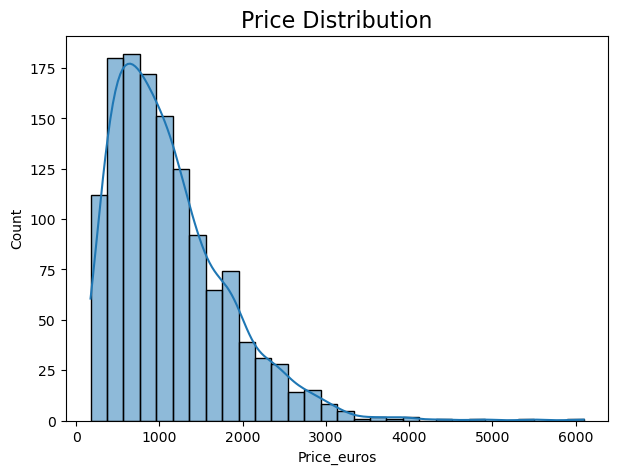

In [46]:
# Exploratory Data Analysis
# Price distribution
plt.figure(figsize =(7,5))
sns.histplot(data = df ,x='Price_euros',kde =True,bins =30 )
plt.title('Price Distribution', fontsize=16)
plt.show()

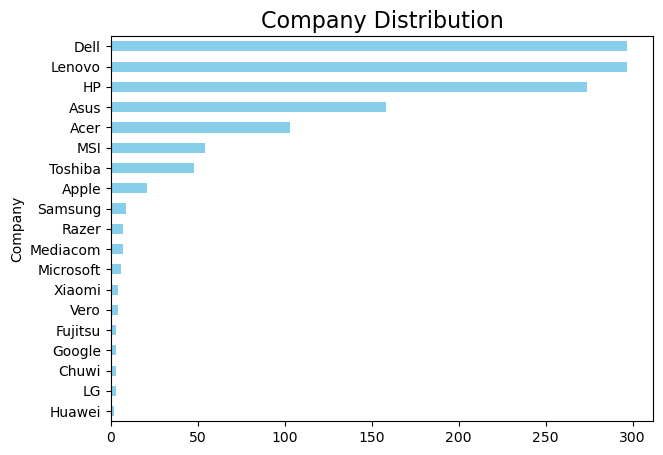

In [47]:
# Company Distribution
plt.figure(figsize=(7,5)) 
df.groupby('Company').size().sort_values().plot.barh(color='skyblue')
plt.title('Company Distribution', fontsize=16)
plt.show()

# Observation
# Best selling company is Dell.

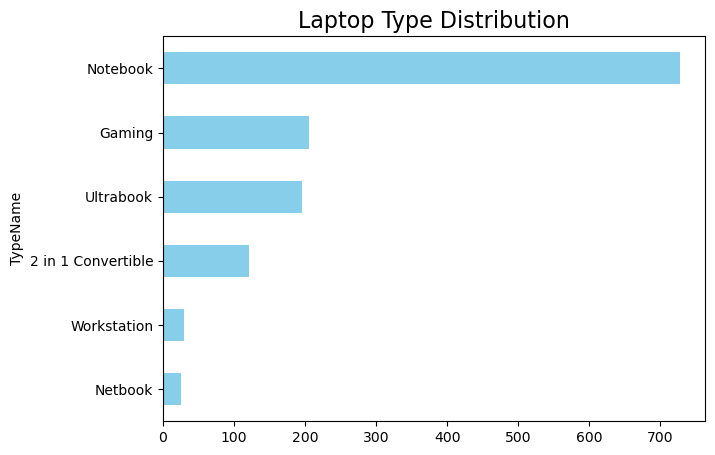

In [48]:
# Typename Distribution
plt.figure(figsize=(7,5)) 
df.groupby('TypeName').size().sort_values().plot.barh(color='skyblue')
plt.title('Laptop Type Distribution', fontsize=16)
plt.show()

# Observation
# Type of best selling laptop is notebook laptop.

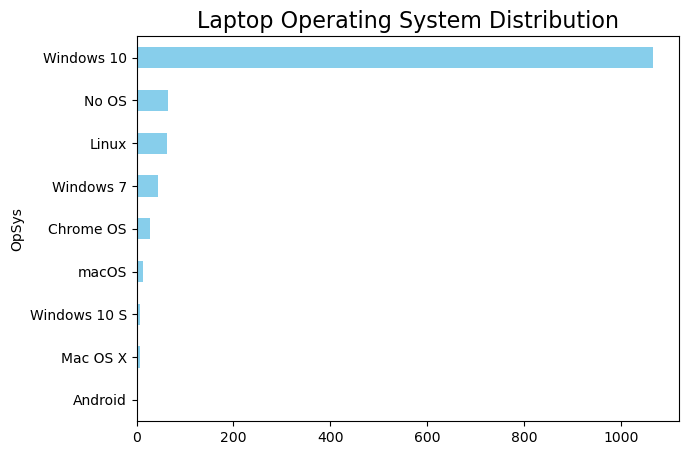

In [49]:
# Operating System Distribution
plt.figure(figsize=(7,5)) 
df.groupby('OpSys').size().sort_values().plot.barh(color='skyblue')
plt.title('Laptop Operating System Distribution', fontsize=16)
plt.show()

# Observation
# OS of best selling laptop is Windows 10.

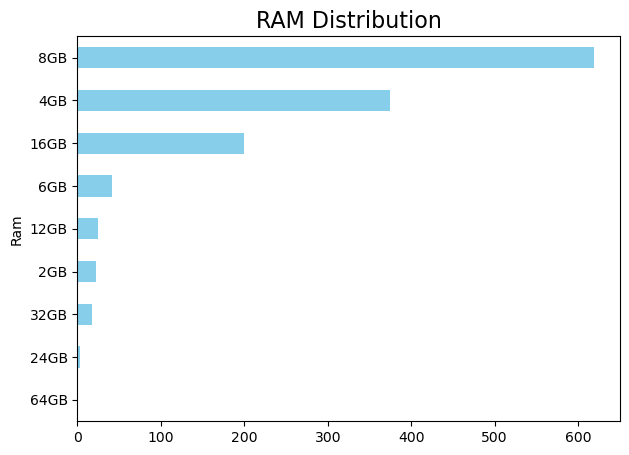

In [50]:
# Operating System Distribution
plt.figure(figsize=(7,5)) 
df.groupby('Ram').size().sort_values().plot.barh(color='skyblue')
plt.title('RAM Distribution', fontsize=16)
plt.show()

# Observation
# RAM of best selling laptop is 8GB.

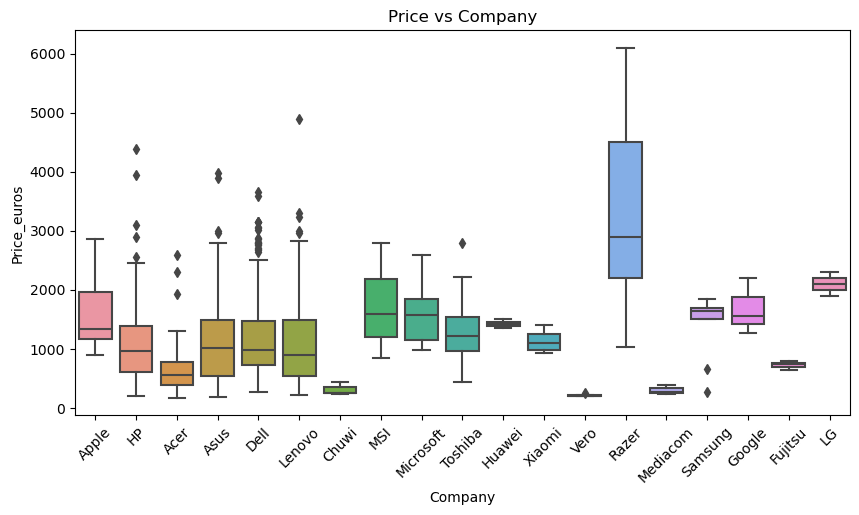

In [51]:
# Relationship between Price and Company
plt.figure(figsize=(10, 5))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title('Price vs Company')
plt.show()

# Observation
# The price for Razer company is the most expensive.

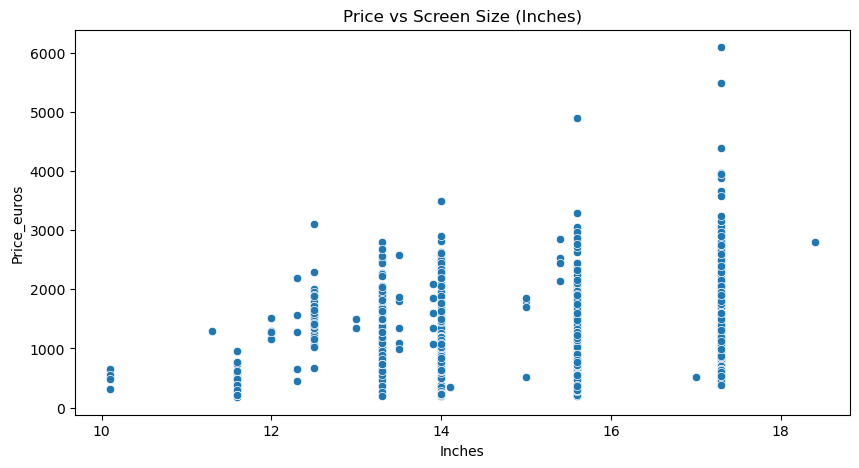

In [52]:
# Relationship between Price and Screen Size (Inches)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Price vs Screen Size (Inches)')
plt.show()

# Observation
# The laptop price become more expensive for the bigger scrren size.

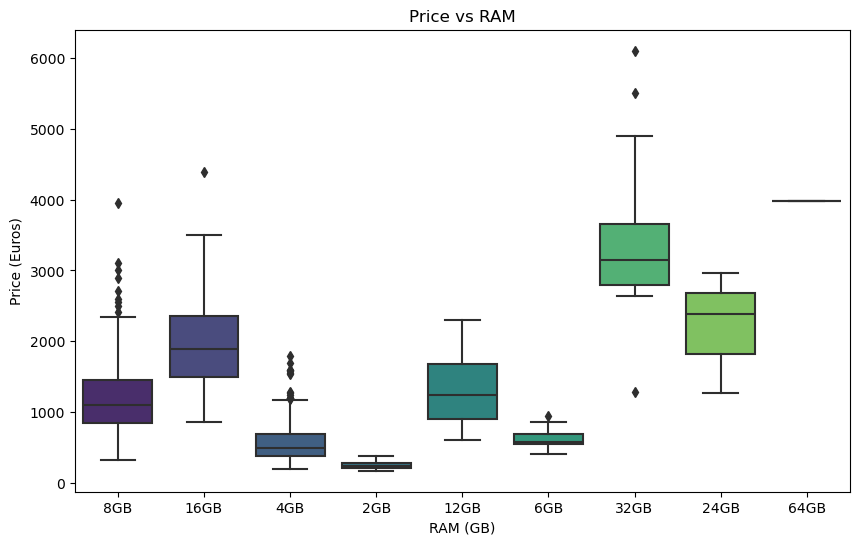

In [53]:
# Boxplot: Price vs RAM
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df, palette='viridis')
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euros)')
plt.show()

# Observation
# laptops with higher RAM tend to be more expensive.

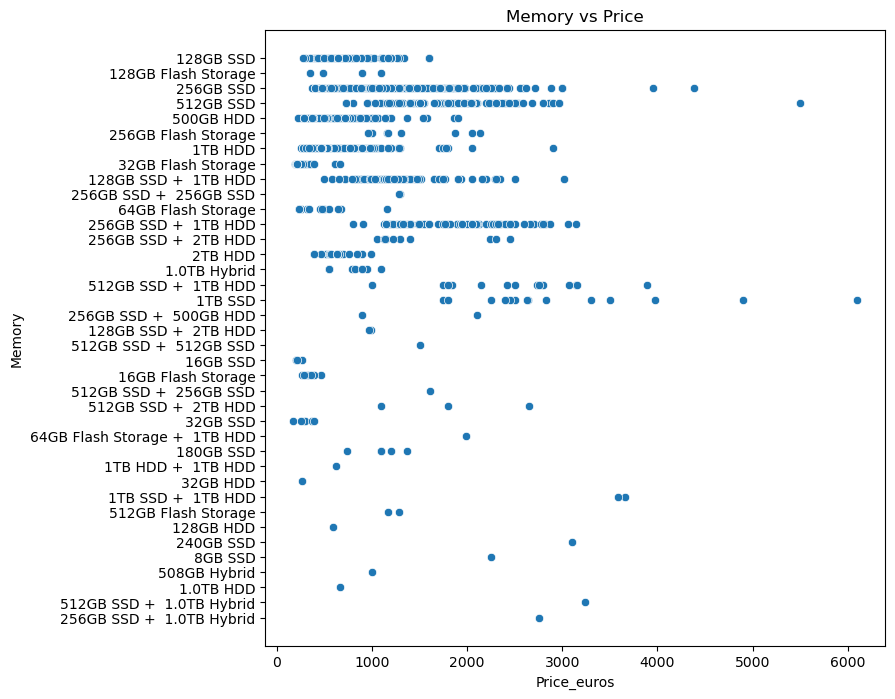

In [54]:
# Memory vs price
plt.figure(figsize=(8,8)) 
sns.scatterplot(df, x='Price_euros', y='Memory')
plt.title('Memory vs Price')
plt.show()

# Observation
# 1TB SSD is the most expensive.

In [55]:
# Data cleaning and preprocessing
# Handle missing data 
# Drop the missing value since it only has fews missing values
df = df.dropna(subset=['Memory', 'Gpu', 'OpSys'])

In [56]:
# Verify the missing values have been handled
print("Missing values of laptop dataset:\n", df.isnull().sum())

Missing values of laptop dataset:
 laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [57]:
# Convert the datatype
df["Weight"] = df["Weight"].str.replace('kg', ' ').astype(float)
df["Ram"] = df["Ram"].str.replace('GB', ' ').astype(int)

In [58]:
df[["Weight","Ram"]]

,Weight,Ram
0,1.37,8
1,1.34,8
2,1.86,8
3,1.83,16
4,1.37,8
...,...,...
1298,1.80,4
1299,1.30,16
1300,1.50,2
1301,2.19,6


In [59]:
# Drop irrelated features
df.drop(columns=['laptop_ID'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1284 non-null   object 
 1   Product           1284 non-null   object 
 2   TypeName          1284 non-null   object 
 3   Inches            1284 non-null   float64
 4   ScreenResolution  1284 non-null   object 
 5   Cpu               1284 non-null   object 
 6   Ram               1284 non-null   int32  
 7   Memory            1284 non-null   object 
 8   Gpu               1284 non-null   object 
 9   OpSys             1284 non-null   object 
 10  Weight            1284 non-null   float64
 11  Price_euros       1284 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 125.4+ KB


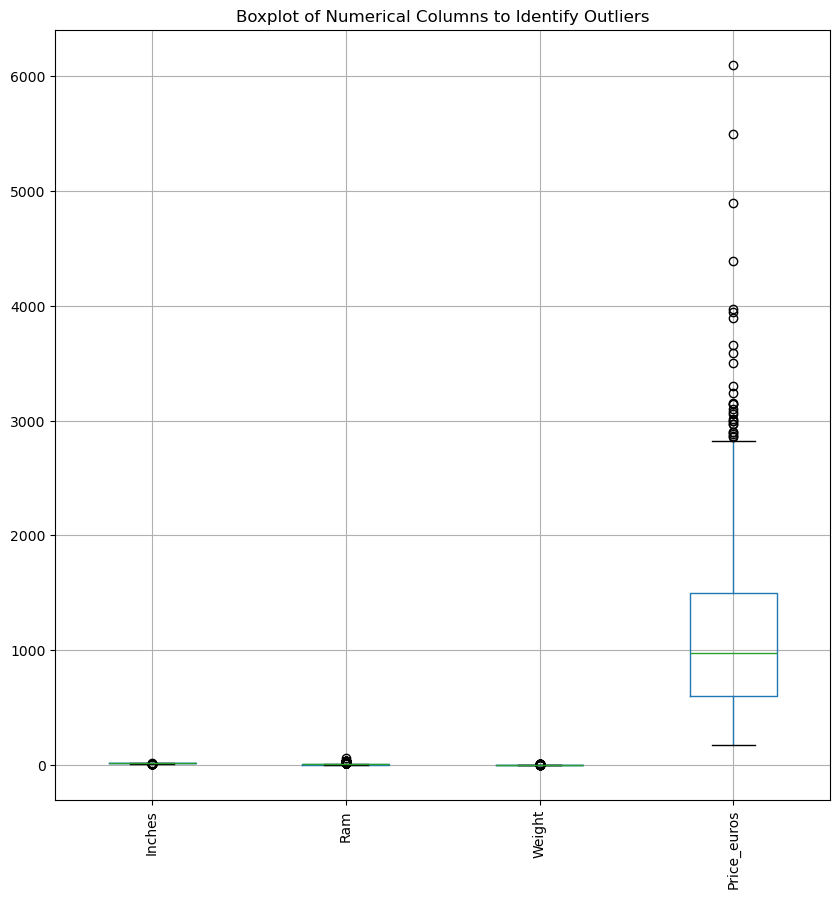

Outliers in Numerical Columns:
{'Inches': 39, 'Ram': 221, 'Weight': 46, 'Price_euros': 28}


In [60]:
# Visualize and Identify Outliers for Numerical Columns (Boxplot and IQR)
def check_numerical_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Plot boxplots for all numeric columns
    plt.figure(figsize=(10, 10))
    numeric_df.boxplot()
    plt.xticks(rotation=90)
    plt.title("Boxplot of Numerical Columns to Identify Outliers")
    plt.show()
    
    # Calculate the IQR and detect outliers for each numeric column
    outlier_dict = {}
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]
        outlier_dict[col] = outliers.shape[0]
    
    print("Outliers in Numerical Columns:")
    print(outlier_dict)

check_numerical_outliers(df)

In [61]:
# Handle the outlier
def handle_numerical_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])
    
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers to lower/upper bounds
        # This capping helps to limit the influence of extreme values on analysis and models
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

handle_numerical_outliers(df)

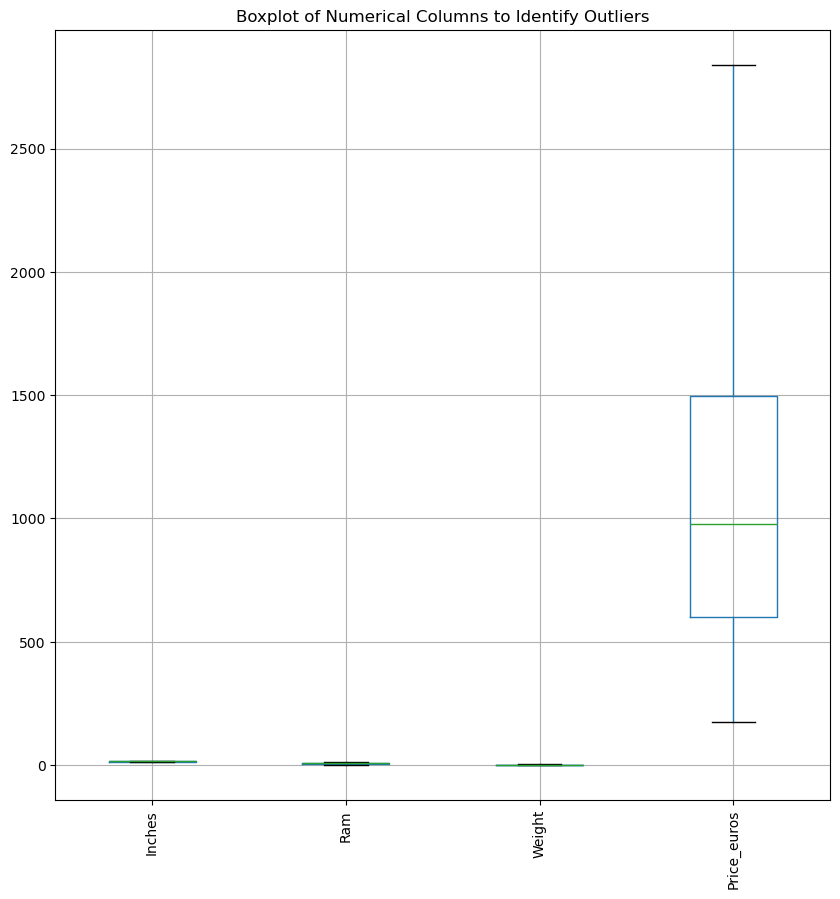

Outliers in Numerical Columns:
{'Inches': 0, 'Ram': 0, 'Weight': 0, 'Price_euros': 0}


In [62]:
# Verified whether the outlier has been handle or not
def check_numerical_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Plot boxplots for all numeric columns
    plt.figure(figsize=(10, 10))
    numeric_df.boxplot()
    plt.xticks(rotation=90)
    plt.title("Boxplot of Numerical Columns to Identify Outliers")
    plt.show()
    
    # Calculate the IQR and detect outliers for each numeric column
    outlier_dict = {}
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]
        outlier_dict[col] = outliers.shape[0]
    
    print("Outliers in Numerical Columns:")
    print(outlier_dict)

check_numerical_outliers(df)

In [63]:
# Model Building
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Split the training and test data
# 80% data used for training while 20% data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Scaling data
# StandardScaler is to standarlize features by removing the mean and scaling to unit variance.
# OneHotEncoder is used to convert categorical variables into a format that can be provided to ML algorithms to improve predictions.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer is used to apply different preprocessing steps to different columns of the data.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting and transform the training and testing data
# Accurate evaluation of model's performance
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check the size of the training and testing data after transformation
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

print(f"X_train shape: {X_train_shape}")
print(f"X_test shape: {X_test_shape}")
print(f"y_train shape: {y_train_shape}")
print(f"y_test shape: {y_test_shape}")

# Observation
# X_train (Features of training): 1027 instances and 832 features
# X_test (Features of testing): 257 instances and 832 features
# y_train (Target variable of training): 1027 target values
# y_test (Target variable of testing): 257 target values

# Why the features become more?
# After transform, the categorical will encoded into multiple binary features.
# For example: 10 categorical features x 80 unique values = 800 features.

X_train shape: (1027, 832)
X_test shape: (257, 832)
y_train shape: (1027,)
y_test shape: (257,)


In [64]:
# Define models
models = {
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        n_estimators=100, random_state=0),
}

# Initialize a list to store the results
results = []

# Fit models and collect metrics
# Using mae, mse, and r2score to evaluate the performance of regression models.
# mae: how close predictions are to the actual outcomes
# mse: measures the average squared difference between actual and predicted values
# r2 score: provides a measure of how well the model explains the variability of the response data.
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R² Score': r2})

# Create a DataFrame
results_df = pd.DataFrame(results)

# Print the results as a table
results_df

,Model,MAE,MSE,R² Score
0,LinearRegression,200.852983,91082.552744,0.778133
1,GradientBoostingRegressor,213.012396,85332.083627,0.792141


In [65]:
# Define the hyperparameters to tune for each model
# Linear Regression:
# fit_intercept: Whether to calculate the intercept for this model. If set to False, no intercept will be used in the calculations.
# positive: If True, the coefficients of the model will be constrained to be positive.

# Gradient Boosting Regressor:
# n_estimators: Number of trees in the ensemble. More trees can lead to better performance but may also lead to overfitting.
# learning_rate: Step size shrinkage used in update to prevents overfitting. Lower values make the model more robust but require more 
# trees to maintain performance.
# max_depth: Maximum depth of a tree. Increasing this value will make the model more complex and potentially lead to overfitting.
# subsample: Controls the proportion of the training data that is used to fit each tree in the boosting process

param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [150, 250],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
}

# Initialize a list to store the results after tuning
results_after_tuning = []

# Perform grid search for hyperparameter tuning
# Grid search is a function that performs an exhaustive search over the specified parameter values for a given model.
# Using grid search because it work through multiple combinations of parameter options
# cv = 5 means the split into 5 folds. Each fols used as validation set while remaining folds used for training.
# n_jobs=-1 means to use all available processors for the computation, speeding up the process.
# scoring='neg_mean_absolute_error' used for evaluation. It uses negative mean absolute error (MAE), as lower MAE is better, 
# but GridSearchCV seeks to maximize the score.
for model_name, model in models.items():
    try:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)

        # Make predictions using the best estimator
        preds = grid_search.best_estimator_.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        results_after_tuning.append({
            'Model': model_name,
            'Best Parameters': grid_search.best_params_,
            'MAE': mae,
            'MSE': mse,
            'R² Score': r2
        })

    except Exception as e:
        print(f"An error occurred while processing {model_name}: {e}")

# Create a DataFrame for results after tuning
results_after_df = pd.DataFrame(results_after_tuning)

# Set pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap DataFrame
pd.set_option('display.max_colwidth', None)

# Print the results before tuning
print("\nResults (Before Tuning):")
print(results_df)

# Print the results after tuning
print("\nResults (After Tuning):")
print(results_after_df)

# Observation
# Linear Regression (0.7781 to 0.7724)
# The tuned model may have become more complex due to certain parameters that lead to overfitting on the training data, 
# which can cause it to perform worse on unseen data.

# Gradient Boosting Regressor (0.792141 to 0.8602)
# The performance become better. 


Results (Before Tuning):
                       Model         MAE           MSE  R² Score
0           LinearRegression  200.852983  91082.552744  0.778133
1  GradientBoostingRegressor  213.012396  85332.083627  0.792141

Results (After Tuning):
                       Model                                                                Best Parameters         MAE           MSE  R² Score
0           LinearRegression                                    {'fit_intercept': False, 'positive': False}  200.245030  93442.529667  0.772385
1  GradientBoostingRegressor  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.8}  157.424836  57378.168258  0.860233


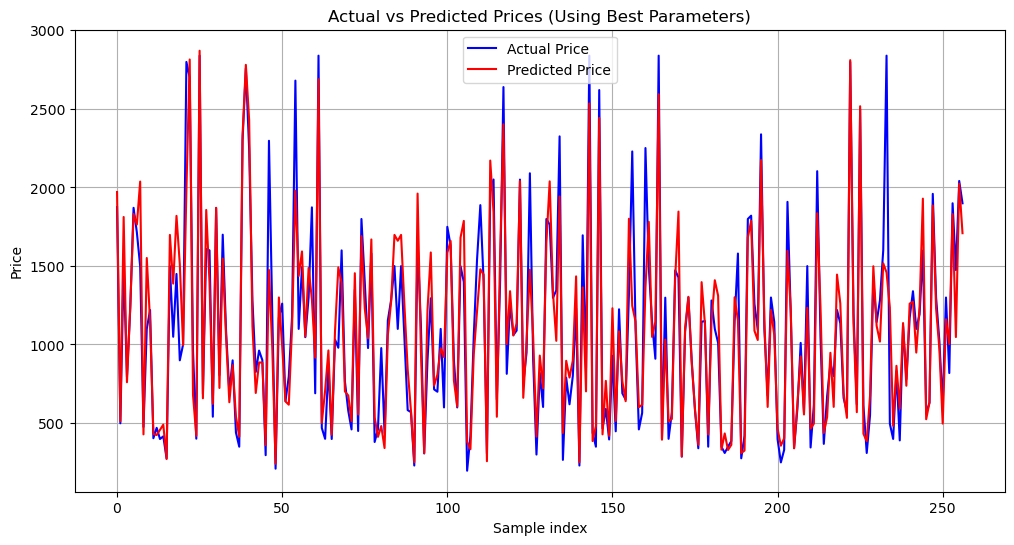

In [66]:
# Define the best parameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 250,
    'subsample': 0.8,
    'random_state': 0  
}

# Usee the GradientBoostingRegressor with the best parameters
best_gbr = GradientBoostingRegressor(**best_params)

# Fit the model on the training data
best_gbr.fit(X_train, y_train)

# Use the model to predict the test set
preds = best_gbr.predict(X_test)

# Create a DataFrame to view actual and predicted prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': preds})

# Plot the graph of actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(results['Actual Price'].values, label='Actual Price', color='blue')
plt.plot(results['Predicted Price'].values, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Prices (Using Best Parameters)') 
plt.xlabel('Sample index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Get the first 20 rows from the dataset
first_20_rows = df.head(20)

# Separate features and target variable from these rows
X_first_20 = first_20_rows.drop('Price_euros', axis=1)
y_first_20 = first_20_rows['Price_euros']

# Preprocess the input features using the same preprocessor as before
X_first_20_processed = preprocessor.transform(X_first_20)

# Predict the prices using the trained model
predicted_prices = best_gbr.predict(X_first_20_processed)

# Create a DataFrame to display actual and predicted prices
results = pd.DataFrame({
    'Actual Price': y_first_20,
    'Predicted Price': predicted_prices
})

# Calculate the differences
results['Difference'] = results['Predicted Price'] - results['Actual Price']

# Add the predicted prices back to the original DataFrame
df.loc[first_20_rows.index, 'Predicted Price'] = predicted_prices
df.loc[first_20_rows.index, 'Difference'] = results['Difference']

# Display the updated DataFrame with predicted prices and differences
df[['Price_euros', 'Predicted Price', 'Difference']].head(20)


,Price_euros,Predicted Price,Difference
0,1339.69,1378.807636,39.117636
1,898.94,1218.725153,319.785153
2,575.00,583.129304,8.129304
3,2537.45,2515.328229,-22.121771
4,1803.60,1733.997770,-69.602230
5,400.00,417.932895,17.932895
6,2139.97,2139.680995,-0.289005
7,1158.70,1208.218780,49.518780
8,1495.00,1780.718169,285.718169
9,770.00,809.403555,39.403555
